In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import math

# two discs case

![](./2.png)

In [148]:
# set physical parameters
l1=0.08
l2=0.04
l3=0.08

l11=0.12
l12=0.12

l111=0.06
l222=0.04
l333=0.04
l444=0.06



A=0.005
r=0.0006
Tmax=0.009
k=25

In [149]:
# define delta_x fomula for two discs

def delta_1 (theta_1) :
    delta_x1=sp.sqrt(l1**2-A**2)-sp.sqrt(l1**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x1)

def delta_2 (theta_2) :
    delta_x2=sp.sqrt(l2**2-(2*A)**2)-sp.sqrt(l2**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x2)

def delta_3 (theta_3) :
    delta_x3=sp.sqrt(l3**2-A**2)-sp.sqrt(l3**2-(A+r*theta_3*(math.pi))**2)
    return(delta_x3)


In [150]:
# define delta_x fomula for one disc system
def delta_11 (theta_1) :
    delta_x1=sp.sqrt(l11**2-A**2)-sp.sqrt(l11**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x1)

def delta_12 (theta_2) :
    delta_x2=sp.sqrt(l12**2-A**2)-sp.sqrt(l12**2-(A+r*theta_2*(math.pi))**2)
    return(delta_x2)

In [151]:
# define delta_x fomula for three discs
def delta_111 (theta_1) :
    delta_x1=sp.sqrt(l111**2-A**2)-sp.sqrt(l111**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x1)

def delta_222 (theta_2) :
    delta_x2=sp.sqrt(l222**2-(2*A)**2)-sp.sqrt(l222**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x2)

def delta_333 (theta_3) :
    delta_x3=sp.sqrt(l333**2-(2*A)**2)-sp.sqrt(l333**2-(2*A+r*theta_3*(math.pi))**2)
    return(delta_x3)

def delta_444 (theta_4) :
    delta_x4=sp.sqrt(l444**2-A**2)-sp.sqrt(l444**2-(A+r*theta_4*(math.pi))**2)
    return(delta_x4)


In [152]:
theta=sp.symbols("theta",real=True)

delta_x_two_disc=delta_1((l1/(l1+l2*l3))*theta)+delta_2((l2/(l1+l2+l3))*theta)+delta_3((l3/(l1+l2+l3))*theta)

In [153]:
 
delta_x_one_disc=delta_11((l11/(l11+l12))*theta)+delta_12((l12/(l11+l12))*theta)

In [154]:
delta_x_three_disc=delta_111((l111/(l111+l222+l333+l444))*theta)+delta_222((l222/(l111+l222+l333+l444))*theta)+delta_333((l333/(l111+l222+l333+l444))*theta)+delta_444((l444/(l111+l222+l333+l444))*theta)

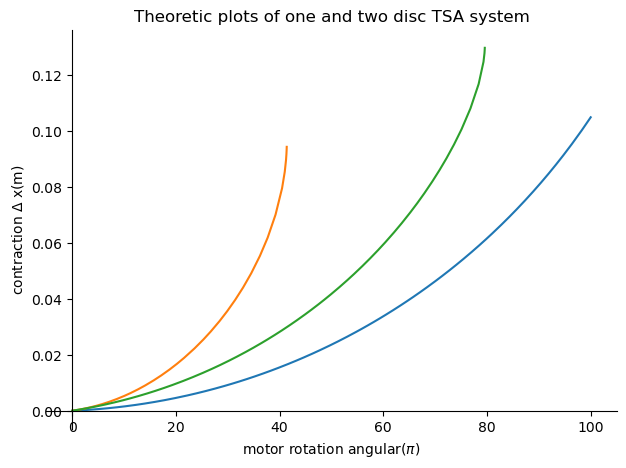

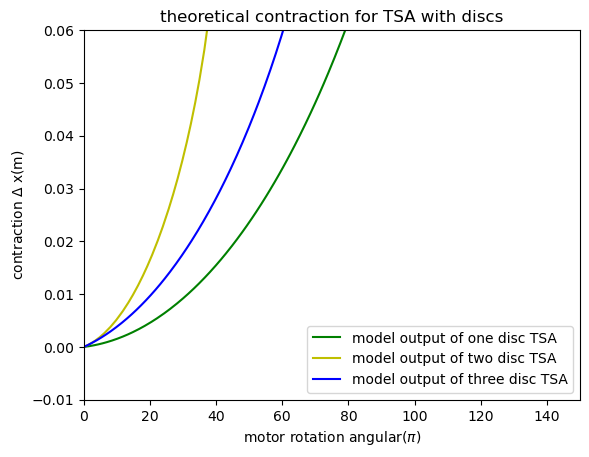

In [155]:
# switch sympy to matplot
Line1,Line2,Line3=sp.plot(delta_x_one_disc,delta_x_two_disc,delta_x_three_disc,(theta,0,100),title='Theoretic plots of one and two disc TSA system',
       xlabel='motor rotation angular($\pi$)',ylabel='contraction $\Delta$ x(m)')
x_one,y_one=Line1.get_points()
x_two,y_two=Line2.get_points()
x_three,y_three=Line3.get_points()

plt.plot(x_one,y_one,color='g',label= 'model output of one disc TSA')
plt.plot(x_two,y_two,color='y',label='model output of two disc TSA')
plt.plot(x_three,y_three,color='b',label='model output of three disc TSA')
plt.legend()
plt.title('theoretical contraction for TSA with discs')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(m)')
plt.ylim((-0.01,0.06))
plt.xlim((0,150))
plt.show()


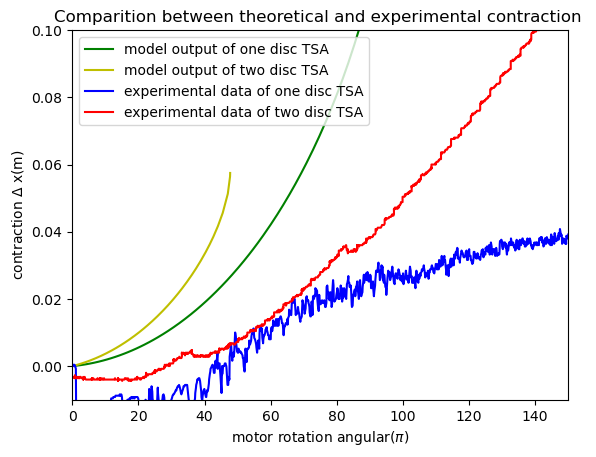

In [107]:
#upload date to Notebook
xls1 = pd.ExcelFile('2strings.xlsx')
df1 = pd.read_excel(xls1, 'one_disc')
df2 = pd.read_excel(xls1, 'two_disc')

df1.columns=["θ","delta_x"]
df1["θ"]=df1["θ"]*13/180
df1["delta_x"]=df1["delta_x"]/k

df2.columns=["θ","delta_x"]
df2["θ"]=df2["θ"]*13/180
df2["delta_x"]=df2["delta_x"]/k

x1=np.array(df1["θ"])
y1=np.array(df1["delta_x"])

x2=np.array(df2["θ"])
y2=np.array(df2["delta_x"])


# for i in range(len(x_points)):
#     ax1.plot(x_points[i], y_points[i], color='r')
#     ax1.scatter(x_points[i], y_points[i], color='b')

plt.plot(x_one,y_one,color='g',label= 'model output of one disc TSA')
plt.plot(x_two,y_two,color='y',label='model output of two disc TSA')
plt.plot(x1,y1,color='b',label= 'experimental data of one disc TSA')
plt.plot(x2,y2,color='r',label= 'experimental data of two disc TSA')
plt.legend()
plt.title('Comparition between theoretical and experimental contraction ')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(m)')
plt.ylim((-0.01,0.1))
plt.xlim((0,150))
plt.show()

